# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("/Users/Oswal/Documents/GitHub/mini-project-IV-deployment-/notebooks/data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [2]:
print(df.isna().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


Look at some basic statistics for numerical variables.

In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [4]:
for col in df.columns: 
    print(f"{col} : {df[col].nunique}")

Loan_ID : <bound method IndexOpsMixin.nunique of 0      LP001002
1      LP001003
2      LP001005
3      LP001006
4      LP001008
         ...   
609    LP002978
610    LP002979
611    LP002983
612    LP002984
613    LP002990
Name: Loan_ID, Length: 614, dtype: object>
Gender : <bound method IndexOpsMixin.nunique of 0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object>
Married : <bound method IndexOpsMixin.nunique of 0       No
1      Yes
2      Yes
3      Yes
4       No
      ... 
609     No
610    Yes
611    Yes
612    Yes
613     No
Name: Married, Length: 614, dtype: object>
Dependents : <bound method IndexOpsMixin.nunique of 0       0
1       1
2       0
3       0
4       0
       ..
609     0
610    3+
611     1
612     2
613     0
Name: Dependents, Length: 614, dtype: object>
Education : <bound method IndexOpsMixin.nunique of 0          Gradu

In [5]:
print(df['Married'].value_counts())
print(df['Property_Area'].value_counts())
print(df['Education'].value_counts())
print(df['Dependents'].value_counts())

Yes    398
No     213
Name: Married, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [6]:
for col in df.columns:
    # Check if column is categorical
    if df[col].dtype == 'object':
        print(f"Frequency of different categories in {col}: \n {df[col].value_counts()}\n")

Frequency of different categories in Loan_ID: 
 LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

Frequency of different categories in Gender: 
 Male      489
Female    112
Name: Gender, dtype: int64

Frequency of different categories in Married: 
 Yes    398
No     213
Name: Married, dtype: int64

Frequency of different categories in Dependents: 
 0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Frequency of different categories in Education: 
 Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Frequency of different categories in Self_Employed: 
 No     500
Yes     82
Name: Self_Employed, dtype: int64

Frequency of different categories in Property_Area: 
 Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Frequency of different categories in Loan_Status: 
 Y    42

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



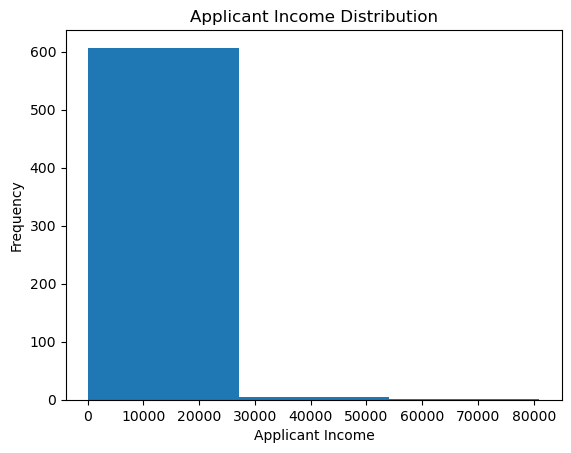

In [7]:
plt.hist(df['ApplicantIncome'], bins=3)
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title('Applicant Income Distribution')
plt.show()

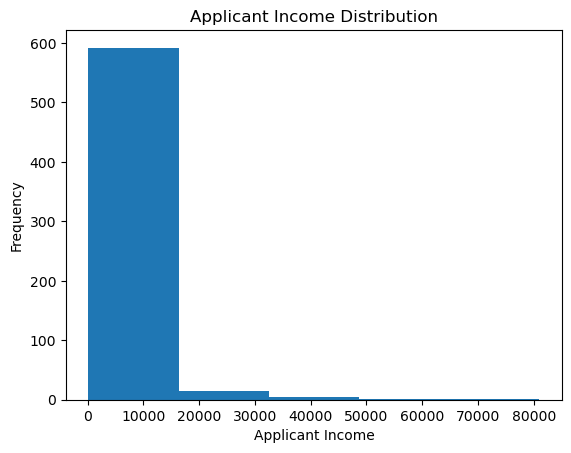

In [8]:
plt.hist(df['ApplicantIncome'], bins=5)
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title('Applicant Income Distribution')
plt.show()

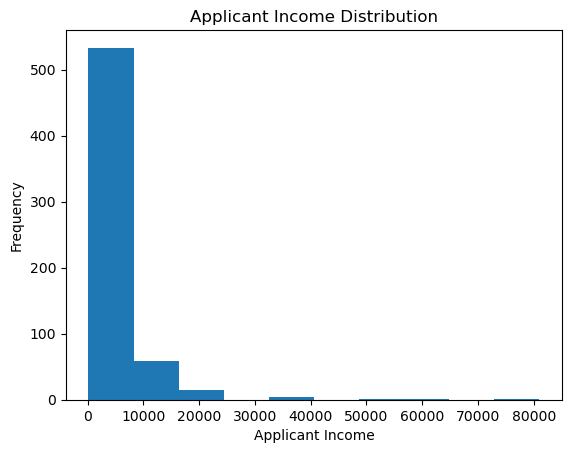

In [9]:
plt.hist(df['ApplicantIncome'], bins=10)
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title('Applicant Income Distribution')
plt.show()

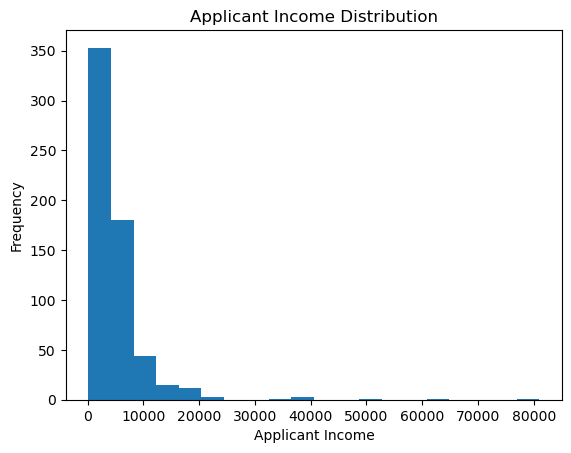

In [10]:
plt.hist(df['ApplicantIncome'], bins=20)
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title('Applicant Income Distribution')
plt.show()

<AxesSubplot: xlabel='ApplicantIncome', ylabel='Count'>

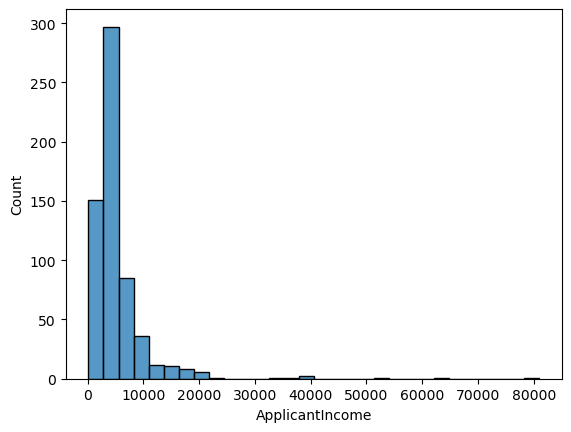

In [11]:
import seaborn as sns
sns.histplot(df['ApplicantIncome'], bins = 30)


Look at box plots to understand the distributions. 

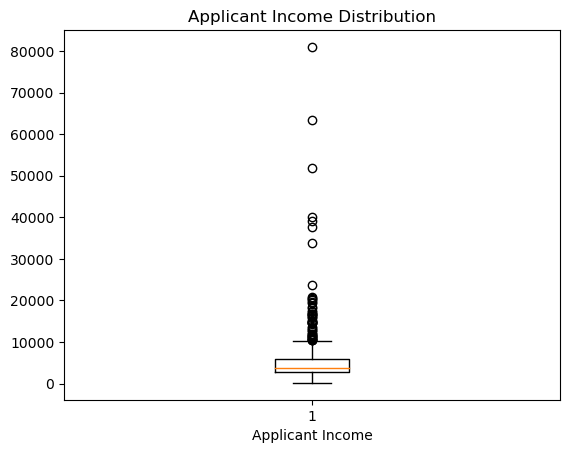

In [12]:
plt.boxplot(df['ApplicantIncome'])
plt.xlabel('Applicant Income')
plt.title('Applicant Income Distribution')
plt.show()

Look at the distribution of income segregated  by `Education`

<AxesSubplot: xlabel='Education', ylabel='Count'>

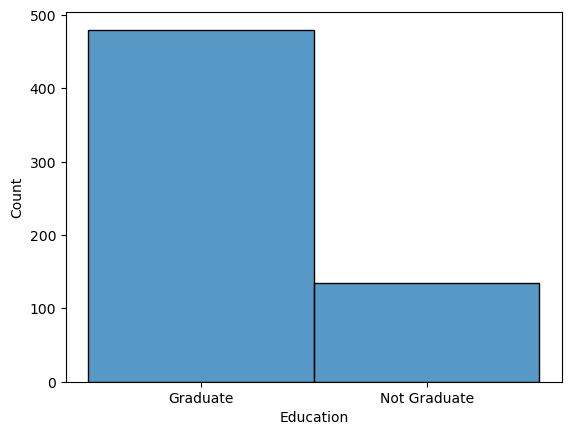

In [13]:
sns.histplot(df['Education'], bins = 2)

Look at the histogram and boxplot of LoanAmount

<AxesSubplot: xlabel='LoanAmount', ylabel='Count'>

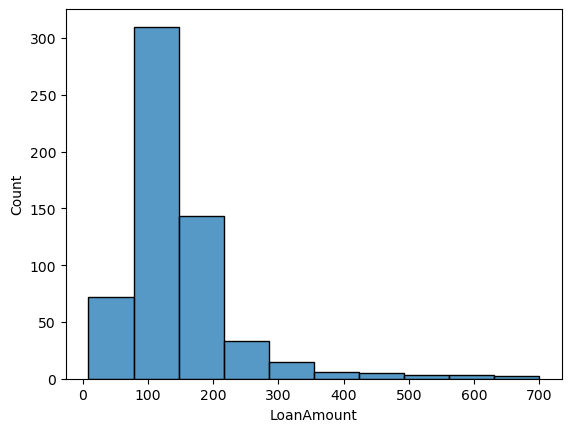

In [14]:
sns.histplot(df['LoanAmount'], bins = 10)

<AxesSubplot: xlabel='LoanAmount'>

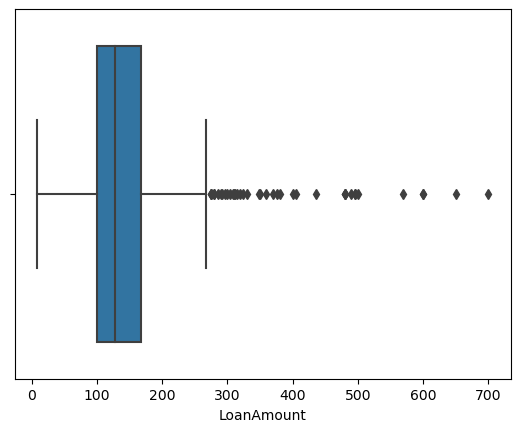

In [15]:
sns.boxplot(x = 'LoanAmount', data= df)

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [16]:
pivot_table = df.pivot_table(values= 'ApplicantIncome', index= 'Education', aggfunc= 'mean')
print(pivot_table)

              ApplicantIncome
Education                    
Graduate          5857.433333
Not Graduate      3777.283582


<AxesSubplot: >

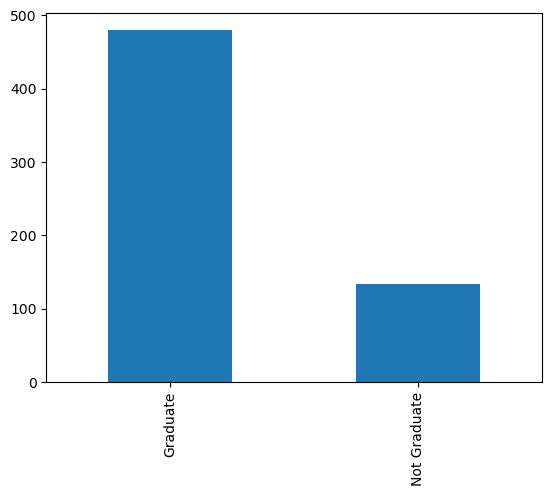

In [17]:
df['Education'].value_counts().plot(kind= 'bar')

In [18]:
pd.crosstab(df['Education'], columns= 'count', normalize= True)

col_0,count
Education,
Graduate,0.781759
Not Graduate,0.218241


In [19]:
pivot_table = df.pivot_table(values='ApplicantIncome', index='LoanAmount', aggfunc='mean')
print(pivot_table)

            ApplicantIncome
LoanAmount                 
9.0                  2378.0
17.0                 1299.0
25.0                 3539.5
26.0                 5468.0
30.0                 2387.5
...                     ...
500.0               18333.0
570.0               19730.0
600.0               29741.5
650.0               20166.0
700.0               51763.0

[203 rows x 1 columns]


<AxesSubplot: xlabel='LoanAmount'>

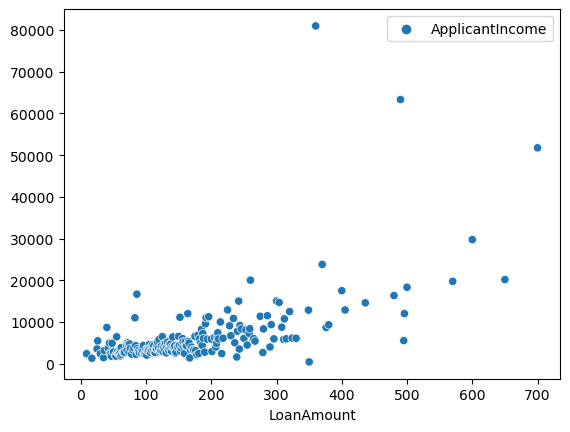

In [20]:
sns.scatterplot(pivot_table)

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [21]:
print(df.isna().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [22]:
# Replace missing values in Loan_Amount_Term with the median
median = df['Loan_Amount_Term'].median()
df['Loan_Amount_Term'].fillna(median, inplace=True)

In [ ]:
median_la = df['LoanAmount'].median()
df['LoanAmount'].fillna(median_la, inplace=True)

In [24]:
print(df.isna().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

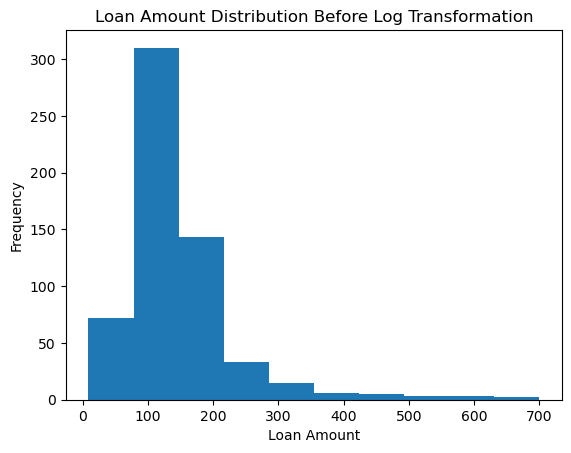

In [23]:
plt.hist(df['LoanAmount'], bins=10)
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Loan Amount Distribution Before Log Transformation')
plt.show()


In [25]:
# Perform log transformation 
df['LoanAmount'] = np.log(df['LoanAmount'])

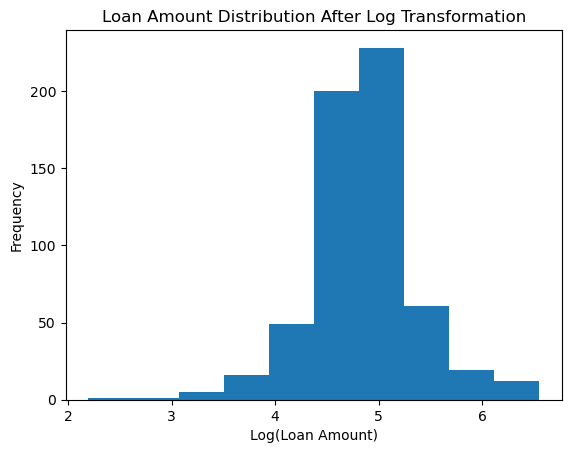

In [26]:
# Plot histogram after log transformation
plt.hist(df['LoanAmount'], bins=10)
plt.xlabel('Log(Loan Amount)')
plt.ylabel('Frequency')
plt.title('Loan Amount Distribution After Log Transformation')
plt.show()

Combine both incomes as total income and take a log transformation of the same.

In [27]:
# Create a new column 'TotalIncome' in df
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [28]:
df['TotalIncome'] = np.log(df['TotalIncome'])

<AxesSubplot: xlabel='TotalIncome', ylabel='Count'>

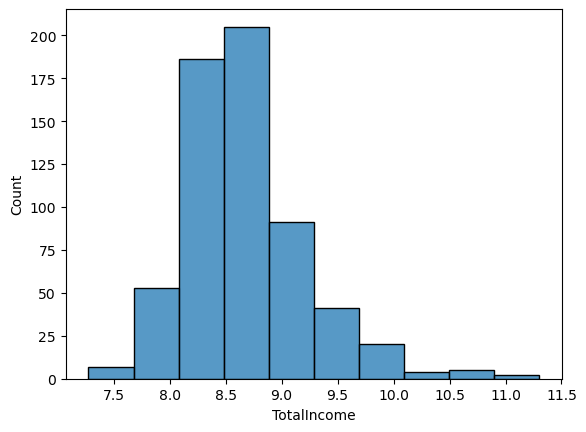

In [29]:
sns.histplot(df['TotalIncome'], bins = 10)

## 4. Building a Predictive Model

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [70]:
# Split data into training and testing sets 
X = df[['ApplicantIncome', 'CoapplicantIncome']]
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

In [71]:
# Create instance of model 
model = LogisticRegression()

In [72]:
# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [73]:
# Make predictions on the testing set
y_pred = model.predict(X_test)


In [74]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 73.17%


Try paramater grid search to improve the results

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
for col in df.columns:
    # Check if column is categorical
    if df[col].dtype == 'object':
        print(f"Frequency of different categories in {col}: \n {df[col].value_counts()}\n")

Frequency of different categories in Loan_ID: 
 LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

Frequency of different categories in Gender: 
 Male      489
Female    112
Name: Gender, dtype: int64

Frequency of different categories in Married: 
 Yes    398
No     213
Name: Married, dtype: int64

Frequency of different categories in Dependents: 
 0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Frequency of different categories in Education: 
 Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Frequency of different categories in Self_Employed: 
 No     500
Yes     82
Name: Self_Employed, dtype: int64

Frequency of different categories in Property_Area: 
 Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Frequency of different categories in Loan_Status: 
 Y    42

In [64]:
# Define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['l2', None]}

# Create an instance of the grid search
grid_search = GridSearchCV(model, param_grid, cv=5, error_score= 'raise')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters: {}".format(grid_search.best_params_))
print("Best score: {:.2f}%".format(grid_search.best_score_ * 100))

Best parameters: {'C': 0.1, 'penalty': 'l2'}
Best score: 36.45%


/opt/homebrew/Caskroom/miniforge/base/envs/THE_ONE/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/THE_ONE/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/THE_ONE/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/THE_ONE/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/THE_ONE/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [78]:
# define the pipeline steps
pipe_steps = [('scaler', StandardScaler()), ('classifier', LogisticRegression())]

In [79]:
# create the pipeline object 
pipe = Pipeline(pipe_steps)

In [80]:
# fit the pipeline to the training data
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression())])

In [105]:
with open ('model.pkl', 'wb') as f: 
    pickle.dump(pipe, f)

In [81]:
# Use pipeline to make predicitions on the test data 
y_pred = pipe.predict(X_test)

In [84]:
# Use the pipeline to predict the probabilities
y_proba = pipe.predict_proba(X_test)

y_proba

array([[0.31097262, 0.68902738],
       [0.30966574, 0.69033426],
       [0.34497086, 0.65502914],
       [0.33107512, 0.66892488],
       [0.31903455, 0.68096545],
       [0.33915663, 0.66084337],
       [0.31066657, 0.68933343],
       [0.31363274, 0.68636726],
       [0.31007464, 0.68992536],
       [0.33622749, 0.66377251],
       [0.30906573, 0.69093427],
       [0.30905568, 0.69094432],
       [0.31154485, 0.68845515],
       [0.342266  , 0.657734  ],
       [0.31455615, 0.68544385],
       [0.30950345, 0.69049655],
       [0.32233382, 0.67766618],
       [0.32264354, 0.67735646],
       [0.3088753 , 0.6911247 ],
       [0.32914163, 0.67085837],
       [0.33909312, 0.66090688],
       [0.32918982, 0.67081018],
       [0.32184381, 0.67815619],
       [0.33936995, 0.66063005],
       [0.32738651, 0.67261349],
       [0.32793945, 0.67206055],
       [0.35431078, 0.64568922],
       [0.36047534, 0.63952466],
       [0.32009294, 0.67990706],
       [0.31001791, 0.68998209],
       [0.

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [87]:
import requests
import json
import numpy as np

In [103]:
# Define the endpoint URL
endpoint = "http://127.0.0.1:5000/"

# Define the data to send in the request
data = json.dumps({"input": X_test.values.tolist()})


In [104]:
# Send the request
response = requests.post(endpoint, data=data)

# Print the response
print(response.text)

In [100]:
!pip install flask-restful

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 3.3 MB/s eta 0:00:00


In [101]:
# import Flask and jsonify
from flask import Flask, jsonify, request
# import Resource, Api and reqparser
from flask_restful import Resource, Api, reqparse
import pandas as pd
import numpy
import pickle


In [106]:

app = Flask(__name__)
api = Api(app)

class RawFeats:
    def __init__(self, feats):
        self.feats = feats

    def fit(self, X, y=None):
        pass


    def transform(self, X, y=None):
        return X[self.feats]

    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

model = pickle.load( open( "model.pkl", "rb" ) )

class Loan_Approval(Resource):
    def post(self):
        json_data = request.get_json()
        df = pd.DataFrame(json_data.values(), index=json_data.keys()).transpose()
        # getting predictions from our model.
        # it is much simpler because we used pipelines during development
        res = model.predict(df)
        # we cannot send numpt array as a result
        return res.tolist()

# assign endpoint
api.add_resource(Loan_Approval, '/loan_approval')

if __name__ == '__main__':
    app.run(debug=True, host='0.0.0.0', port=5555)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5555
 * Running on http://192.168.86.250:5555
Press CTRL+C to quit
 * Restarting with stat
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/THE_ONE/lib/python3.8/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/opt/homebrew/Caskroom/miniforge/base/envs/THE_ONE/lib/python3.8/site-packages/traitlets/config/application.py", line 981, in launch_instance
    app.initialize(argv)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/THE_ONE/lib/python3.8/site-packages/traitlets/config/application.py", line 110, in inner
    return method(app, *args, **kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/THE_ONE/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 632, in initialize
    self.init_sockets()
  File "/opt/homebrew/Caskroom/miniforge/base/envs/THE_ONE/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 282, in ini

SystemExit: 1

/opt/homebrew/Caskroom/miniforge/base/envs/THE_ONE/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
